In [3]:
import pandas as pd
import os
inpath = './data'
files = ['서울교통공사_역별 일별 시간대별 승하차인원 정보_20221231.csv',
          '서울교통공사_역별 일별 시간대별 승하차인원 정보_20231031.csv',
          '서울교통공사_역별 일별 시간대별 승하차인원 정보_23.11_24.01.csv',
          '서울교통공사_역별 일별 시간대별 승하차인원(24.2~24.5).csv']
dfs = []

col_names = ['연번', '날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06시-07시', '07시-08시',
       '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시',
       '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시',
       '20시-21시', '21시-22시', '22시-23시', '23시-24시', '24시 이후']
for file in files:
    df = pd.read_csv(os.path.join(inpath, file), encoding='cp949')
    df.rename(columns=dict(zip(df.columns, col_names)), inplace=True)
    dfs.append(df)
df = pd.concat(dfs)

C:\Users\zerot\AppData\Local\Temp\ipykernel_23328\214377726.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(inpath, file), encoding='cp949')


In [4]:
use_col = ['날짜', '구분', '06시 이전', '06시-07시', '07시-08시',
       '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시',
       '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시',
       '20시-21시', '21시-22시', '22시-23시', '23시-24시', '24시 이후']
df_gasan = df[use_col][df['역명'] == '가산디지털단지'].copy()
df_gasan['출근인원수'] = df_gasan[['07시-08시','08시-09시', '09시-10시']].sum(axis=1).copy()
df_gasan['퇴근인원수'] = df_gasan[['17시-18시','18시-19시', '19시-20시']].sum(axis=1).copy()

df_commute = pd.DataFrame(
    {'datetime': pd.to_datetime(df_gasan['날짜'][df_gasan['구분']=='승차'].tolist()),
     '출근인원수': df_gasan['출근인원수'][df_gasan['구분']=='하차'].tolist(),
     '퇴근인원수': df_gasan['퇴근인원수'][df_gasan['구분']=='승차'].tolist(),
     }
)
df_commute = df_commute[(df_commute['datetime'] >= '2022-05-01') & 
                        ((df_commute['datetime'] < '2023-07-01') | 
                         (df_commute['datetime'] >= '2023-10-01'))]

df_commute['weekday'] = df_commute['datetime'].dt.weekday

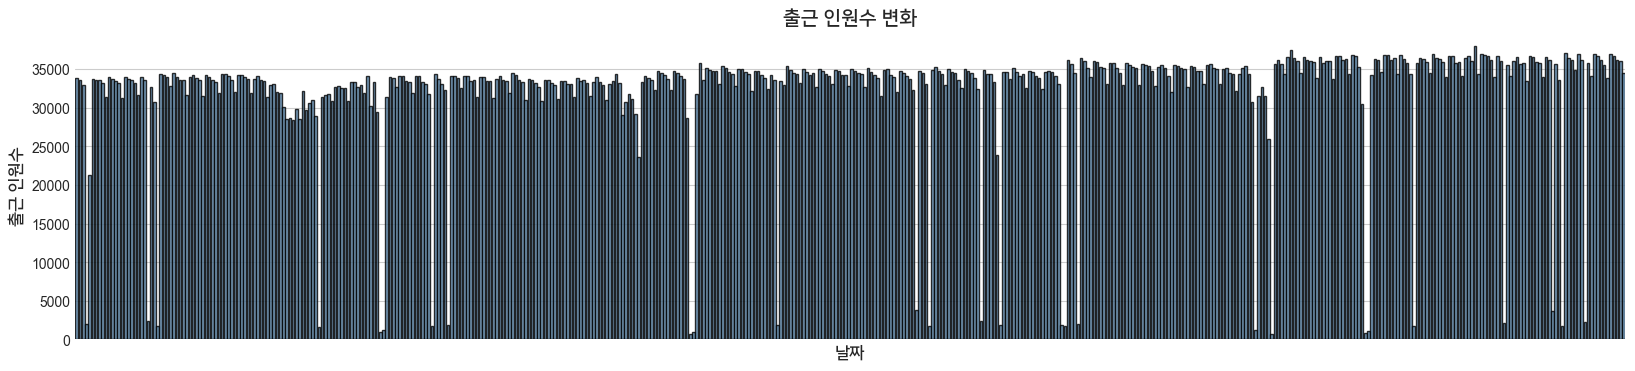

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

df_days = df_commute[df_commute['weekday']<5] 
df_ends = df_commute[df_commute['weekday']>=5]
fn_font = 'NanumSquareB.ttf'

fontprop = fm.FontProperties(fname=fn_font, size=10)

def draw_ts(df):
    fig, ax = plt.subplots(figsize=(20, 4))

    # Seaborn barplot 사용
    sns.barplot(x=df['datetime'], y=df['출근인원수'], color='steelblue', edgecolor='black', alpha=0.8, ax=ax)

    # x축 라벨 설정
    xticks = np.where(df['weekday'] == 0)[0]
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(df['datetime'].dt.strftime('%Y-%m-%d').iloc[xticks], rotation=90, ha='center')
    ax.set_title("출근 인원수 변화", fontproperties=fontprop, fontsize=14)
    ax.set_ylabel("출근 인원수", fontproperties=fontprop, fontsize=12)
    ax.set_xlabel("날짜", fontproperties=fontprop, fontsize=12)
    plt.show()

# draw_ts(df_days[df_days['datetime']<= '2023-07-01'])
draw_ts(df_days)


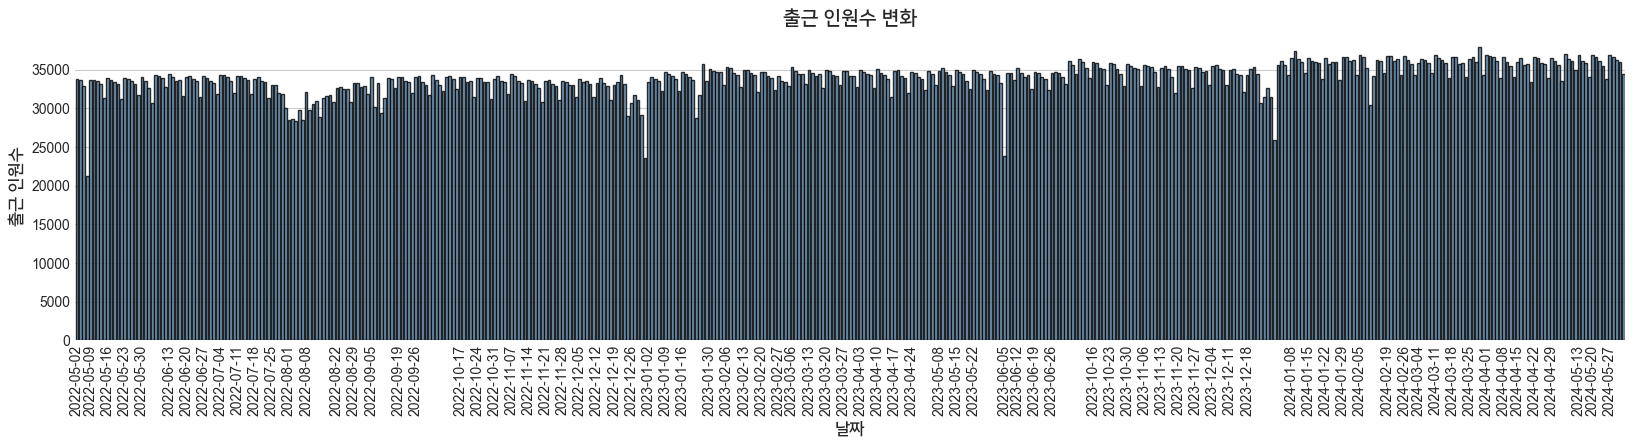

In [65]:
reddays = ['2022-05-01', '2022-05-05', '2022-06-01', '2022-06-06', '2022-08-15',
           '2022-09-09', '2022-09-12', '2022-10-03', '2022-10-10', 
           '2023-01-23', '2023-01-24', '2023-03-01', '2023-05-01', '2023-05-05',
           '2023-05-29', '2023-06-06', '2023-10-02', '2023-10-03', 
           '2023-10-09', '2023-12-25', '2024-01-01', '2024-02-09',
           '2024-02-12', '2024-03-01', '2024-04-10', '2024-05-01', '2024-05-06',
           '2024-05-15']
df_reddays = pd.to_datetime(reddays)

df_days_wo_red = df_days[~df_days['datetime'].isin(df_reddays)]
draw_ts(df_days_wo_red)


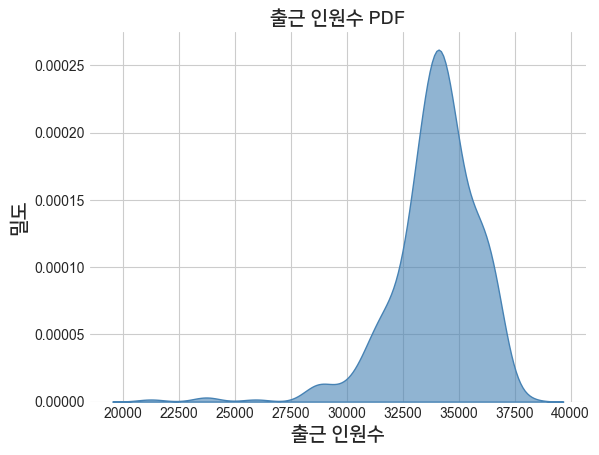

In [68]:
def draw_pdf(df):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # 데이터 예시 (df['출근인원수'] 사용)
    sns.kdeplot(df['출근인원수'], fill=True, color='steelblue', alpha=0.6)

    plt.xlabel("출근 인원수", fontproperties=fontprop, fontsize=14)
    plt.ylabel("밀도", fontproperties=fontprop, fontsize=14)
    plt.title("출근 인원수 PDF", fontproperties=fontprop, fontsize=14)
    plt.show()
draw_pdf(df_days_wo_red)

In [75]:
df_dist = df_days_wo_red.sort_values(by='출근인원수', ascending=False)
df_dist.head(30)

,datetime,출근인원수,퇴근인원수,weekday
817,2024-03-28,37952,29335,3
738,2024-01-09,37496,31674,1
857,2024-05-07,37012,31418,1
877,2024-05-27,36945,30622,0
821,2024-04-01,36913,31301,0
863,2024-05-13,36905,30524,0
800,2024-03-11,36905,31247,0
870,2024-05-20,36896,30695,0
765,2024-02-05,36853,31861,0
822,2024-04-02,36852,30786,1


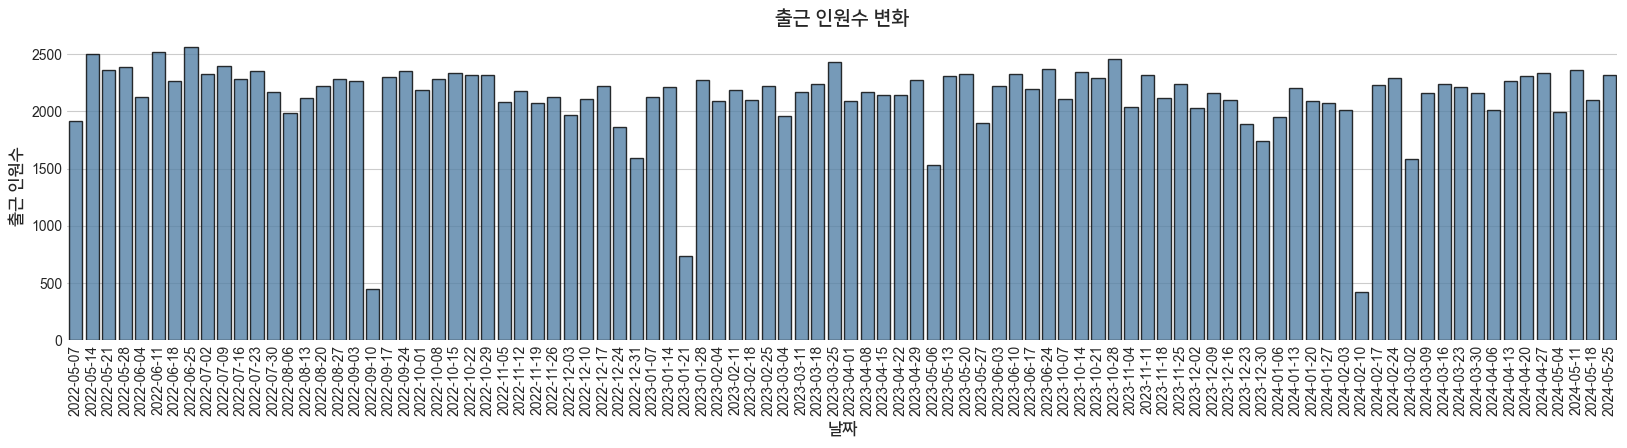

In [80]:
df_ends = df_commute[df_commute['weekday']==5]
draw_ts(df_ends)
